# Part 20 of Recipes: Cell Cycle --- Part 1

This page is primarily based on the following page at the Circos documentation site:



- [20. Cell Cycle --- Part 1](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 19 by clicking [here &#8592;](Recipes_Part19.ipynb).



----



8 --- Recipes
=============

20. Cell Cycle --- Part 1
-------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/cell_cycle_part_1/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/cell_cycle_part_1/images){.normal}
[Configuration](/documentation/tutorials/recipes/cell_cycle_part_1/configuration){.normal}
:::

This tutorial will show you how to use Circos to create a diagram of a
[typical cell cycle](http://en.wikipedia.org/wiki/Cell_cycle) (G1, S,
G2, M) and annotate it with links and text.

The tutorial has two parts, which show two ways of organizing the cycle
and phase axes. In the first part (this one), the each phase has its own
axis. In [Cell Cycle --- Part
2](/documentation/tutorials/recipes/cell_cycle_part_2), there is a
single axis, which represents the full cycle and which is cropped into
individual ideograms that each correspond to a phase. The two approaches
differentiate themselves in how coordinates are defined (relative to
phase or cycle).

### cycle segments

There are four phases in the cell cycle: gap 1 (G1), synthesis (S), gap
2 (G2) and mitosis (M). There\'s also a senescence phase (gap 0, G0),
into which the cell can pass to/from G1. I\'ll ignore G0 in this
example.

The lengths of the phases vary. I have selected durations that mimic the
[cell cycle diagram on
Wikipedia](http://en.wikipedia.org/wiki/Cell_cycle). These are
approximately: G1 45%, S 35%, G2 15% and M 5%.

The first step is to define each of these phases as individual axes.
Circos requires integer coordinates, so I\'ve arbitrarily chosen to make
each phase axis be 100 units long. The variety in axis lengths in the
image will be accomplised by setting `chromosomes_scale`.

```ini
# phases.txt
chr - g1 g1 0 100 greys-4-seq-1
chr - s s 0 100 greys-4-seq-2
chr - g2 g2 0 100 greys-4-seq-3
chr - m m 0 100 greys-4-seq-4
```


Making each of the phase axis lengths equal greatly facilitates defining
coordinates. For example, if you wish to place at 25% into phase G1, the
coordiate is `g1 25 25`.

### segment colors

I\'ve used a grayscale palette for the phases. Using the Brewer grey
4-color sequential palette, `greys-4-seq`, is helpful here. By making
the phase segments grey, colors in other parts of the image will stand
out better.

If you need to color code phases (e.g. you have other image elements
that will inherit a phase\'s color), consider the spectral Brewer
palette. You can always overwrite axis colors using `chromosomes_color`.

```ini
chromosomes_color = g1=spectral-7-seq-2,s=spectral-7-seq-3,g2=spectral-7-seq-6,m=spectral-7-seq-7
```


A useful shortcut is to store the palette name in one variable, and then
use it in `chromosomes_color` using `conf()`.

```ini
palette           = specral-7-seq
chromosomes_color = g1=conf(palette)-2,s=conf(palette)-3,g2=conf(palette)-6,m=conf(palette)-7
```


You can make the definition clearer by adding a [\<phase\>]{.syn-block}
block in which the color indexes are defined. With this approach, the
value of `chromosomes_color` never needs to be adjusted. Instead, you
change the palette name and color indexes in `palette` parameter and
[\<phases\>]{.syn-block} block, which is less prone to error.

```ini
palette  = spectral-7-div
<phases>
g1 = 2
s  = 3
g2 = 6
m  = 7
</phases>
chromosomes_color = g1=conf(palette)-conf(phases,g1),
s=conf(palette)-conf(phases,s),
g2=conf(palette)-conf(phases,g2),
m=conf(palette)-conf(phases,m)
```


### axis organization and tick marks

There are several ways to organize the axis definition for the cell
cycle diagram.

#### one segment per phase

This is the most intuitive approach. Each phase has its own axis, with a
unique name and coordinate. This is the way this tutorial is defined.

The benefit of this approach is that generating coordinates for specific
positions within each phase is trivial.

```ini
# 25% into G1
g1 25 25
# 5% into G2
g2 5 5
# 50% into M
m 50 50
```


The drawback is that generating coordinates based on position within the
cycle is harder. For example, to figure out the coordinate for 60% into
the cycle, you have to first calculate which phase it falls into and
then the relative position within that phase.

#### one segment for cycle, divided into phases

Here, you would define a single axis, which corresponds to the full
length of the cycle.

```ini
# the entire cycle is the axis
chr - cycle cycle 0 100 greys-4-seq-1
```


This second method is covered in the next tutorial, [Cell Cycle --- Part
2](/documentation/tutorials/recipes/cell_cycle_part_2).

#### tick marks

I will set up the tick marks so that they run 0-100% in each phase and
have labels like 0%, 10%, 20%, etc. I will also use grids to visually
divide the phase segments into 5% regions.

Because the spacing will be relative (e.g. every 5% and 10%), we\'ll
need to use the relative tick mark features: `spacing_type` and
`rspacing`.

```ini
<ticks>
spacing_type   = relative
<tick>
rspacing       = 0.05
</tick>
<tick>
rspacing       = 0.10
</tick>
</ticks>
```


We also want the tick mark label to be relative, so that the label at
the 10% tick mark will show 10% and not the actual position that the 10%
corresponds to. Here are the relevant parameters:

```ini
<ticks>
label_relative = yes # the label will be pos/axis_length
format         = %d
rmultiplier    = 100 # 0.45 will be shown as 0.45*100=45
suffix         = %
<tick>
rspacing       = 0.10
show_label     = yes
label_size     = 26p
label_offset   = 5p
</tick>
</ticks>
```


By adding a grid to both the 5% and 10% ticks, you can extend the
divisions provided by the ticks into other parts of the image. The
relevant parameters are

```ini
show_grid           = yes
```


```ini
<ticks>
```


```ini
grid           = yes
grid_start     = dims(ideogram,radius_outer) # grid runs from outer ideogram edge
grid_end       = dims(ideogram,radius_inner) # ... to inner ideogram edge
grid_color     = white
```


```ini
<tick>
rspacing       = 0.05
grid_thickness = 1p
</tick>
```


```ini
<tick>
rspacing       = 0.10
grid_thickness = 2p
</tick>
```


```ini
</ticks>
```


### scaling phases

We\'ve defined the axis sizes for each phase to be the same (100 units).
The actual duration of phases is different, so the axes will need to be
scaled accordingly.

```ini
chromosomes_scale = g1=0.45,s=0.35,g2=0.15,m=0.05
```


The benefit of this approach over scaling coordinates is that you can
change the length of the phases and keep the relative positions of all
points intact without changing any of the coordinates in your data.

```ini
# 45:35:15:5
chromosomes_scale = g1=0.45,s=0.35,g2=0.15,m=0.05
```


```ini
# shorter G1: 20:60:15:5
chromosomes_scale = g1=0.20,s=0.60,g2=0.15,m=0.05
```


### suppressing phases

To remove a phase from the figure, use the `chromosomes` parameter.

```ini
#don't show phase m
chromosomes = -m          
```


### labeling cell cycle phase positions

Suppose that you have identified some genes (A..J) that are active at
certain parts of each phase. Here I define a data file that will be used
to position both symbols and text on the figure. I\'ve given each data
point a `name` and `type` parameter, so that these can be used later to
change the text label and color of the symbol.

```ini
# genes.txt
# A active at 5% into g1
g1 5 5 0 name=A,type=1
# B active at 25% into g1
g1 25 25 0 name=B,type=1
g1 45 45 0 name=C,type=1
g1 55 55 0 name=D,type=1
g1 75 75 0 name=E,type=1
s 25 25 0 name=F,type=1
s 75 75 0 name=G,type=1
g2 15 15 0 name=H,type=2
g2 35 35 0 name=I,type=2
g2 65 65 0 name=J,type=2
```


The labels are created using a text track. The small trick here is that
the position of the text track is inside the phase segments

```ini
r0 = 0.95r
```


but the text label is outside the phase segments, connected by a [label
link](/documentation/tutorials/2d_tracks/text_labels1).

```ini
show_links     = yes
link_dims      = 0p,200p,20p,10p,20p
link_thickness = 3
link_color     = black
```


We also need a rule that changes the label of the text, because the data
file has `0` for each position. We\'ll derive the value of the text data
point, which is what the label will be, from the `name` parameter.

```ini
<rule>
condition = 1
value     = eval(var(name))
</rule>
```


### marking cell cycle phase positions with symbols

One way to place symbols on the plot is define a zero-height scatter
plot. We can use the same data file as for the text labels. Rules will
be used to change the color of the symbol based on the `type` parameter.

```ini
<plot>
type = scatter
file = genes.txt
r0   = 0.95r
r1   = 0.95r
```


```ini
glyph            = circle
glyph_size       = 36
color            = white
stroke_color     = black
stroke_thickness = 2
```


```ini
<rules>
<rule>
condition = var(type) == 1
color     = blues-5-seq-4
</rule>
<rule>
condition = var(type) == 2
color     = reds-5-seq-4
</rule>
</rules>
```


```ini
</plot>
```


### connecting cell cycle positions

To connect positions in the cycle with curves, the link track is used.
Here the input data file defines each link as a coordinate pair, with
any optional parameters.

```ini
# links.txt
g1 5 5 g1 25 25 type=1
g1 5 5 g1 45 45 type=1
g1 5 5 g1 55 55 type=1
g1 5 5 g1 75 75 type=1
g2 15 15 g2 35 35 type=2
g2 15 15 g2 65 65 type=2
...
```


Note that these positions have to be defined again --- the coordinates
in the `genes.txt` file used for the text labels and symbol positions
cannot be referenced.

```ini
<link>
file          = links.txt
```


```ini
radius        = 0.95r
bezier_radius = 0r
```


```ini
# shorter links will be drawn closer
# to the edge of the circle
bezier_radius_purity = 0.1
crest                = 1
thickness            = 3
```


```ini
<rules>
<rule>
condition = var(type) == 1
color     = red
</rule>
<rule>
condition = var(type) == 2
color     = blue
</rule>
</rules>
```


```ini
</link>
```


I\'ve used rules to change the color of the link based on the value of
the `type` parameter in the `links.txt` file.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/20/

/home/jovyan/circos-tutorials-0.67/tutorials/8/20


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.41s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/20
debuggroup summary 0.41s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.41s loading configuration from file circos.conf
debuggroup summary 0.41s found conf file circos.conf
debuggroup summary 0.61s debug will appear for these features: output,summary
debuggroup summary 0.61s bitmap output image ./circos.png
debuggroup summary 0.61s SVG output image ./circos.svg
debuggroup summary 0.61s parsing karyotype and organizing ideograms
debuggroup summary 0.61s karyotype has 4 chromosomes of total size 404
debuggroup summary 0.61s applying global and local scaling
debuggroup summary 0.62s allocating image, colors and brushes
debuggroup summary 2.87s drawing 3 ideograms of total size 303
debuggroup summary 2.87s drawing highlights and ideograms
debuggroup summary 3.04s found conf 

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 15.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 51.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

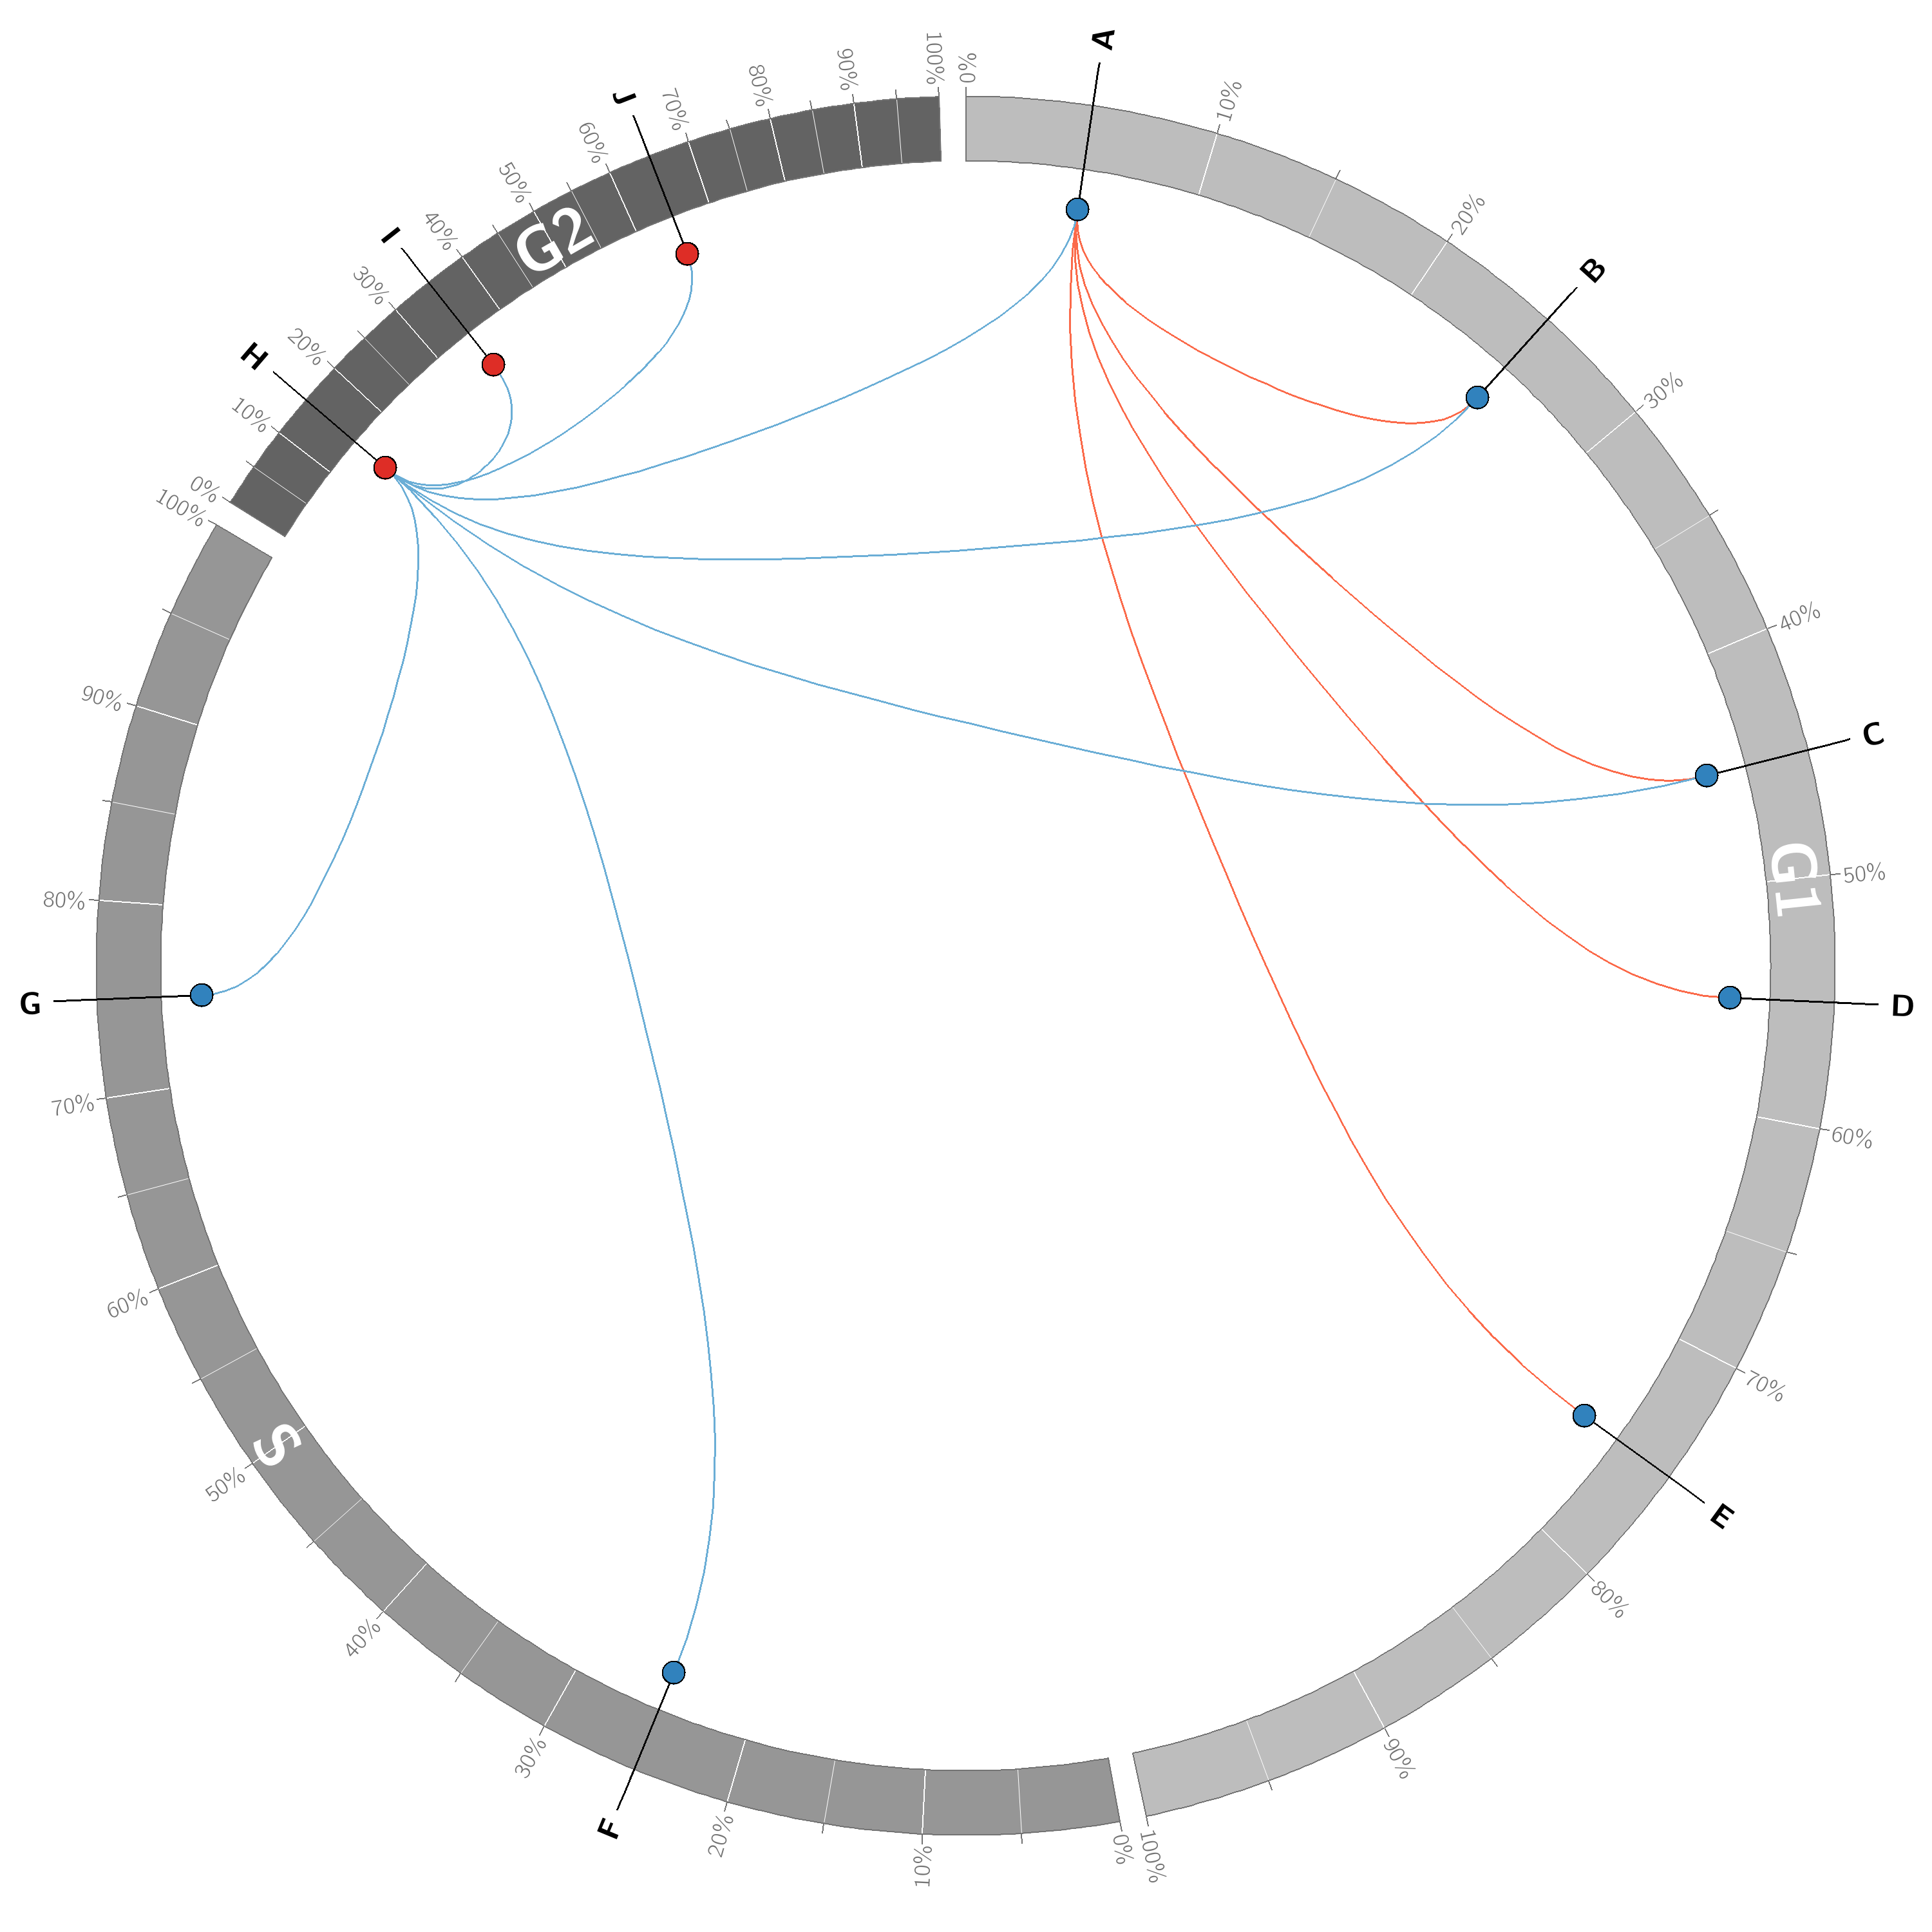

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part21.ipynb).

----